# The main aim behind this project is to compare different classification models on the given data set and perform hyper parameter tuning using GridSearchCV

## The dataset is obtained from kaggle


In [8]:
# importing some important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


In [12]:
data=pd.read_csv("G:\Datasets\SaleAnalysis\SalesKaggle.csv")

In [13]:
data1=pd.read_csv("G:\Datasets\SaleAnalysis\SalesKaggle.csv")

In [14]:
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


## checking for null values

In [15]:
data.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [16]:
data.shape

(198917, 14)

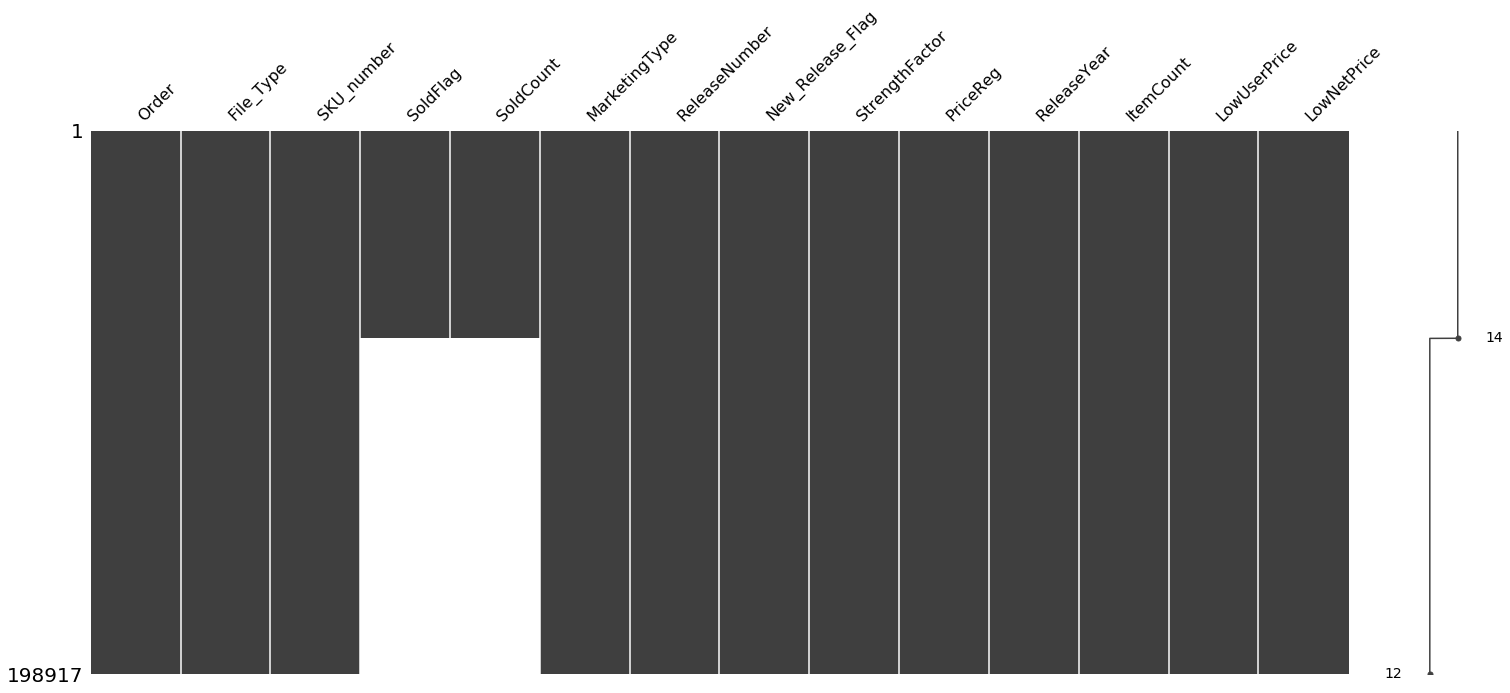

In [17]:
missingno.matrix(data)

## the above matrix plot shows us that all the null values are at bottom of dataset

### We gonna be droping off some columns that are related unrelevant and unique per row such as SKU_number , etc 

In [18]:
data=data.drop(["SKU_number","Order","SoldCount","ReleaseYear"],axis=1)

In [19]:
data.head()

,File_Type,SoldFlag,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,Historical,0.0,D,15,1,682743.0,44.99,8,28.97,31.84
1,Historical,0.0,D,7,1,1016014.0,24.81,39,0.00,15.54
2,Historical,0.0,D,0,0,340464.0,46.00,34,30.19,27.97
3,Historical,1.0,D,4,1,334011.0,100.00,20,133.93,83.15
4,Historical,1.0,D,2,1,1287938.0,121.95,28,4.00,23.99


## now checking for data distribution of Strength Factor column

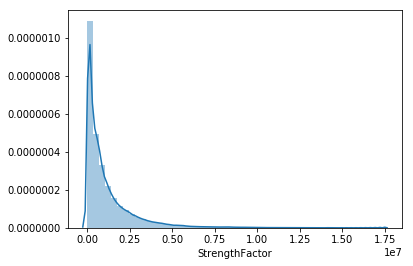

In [10]:
sns.distplot(data.StrengthFactor)

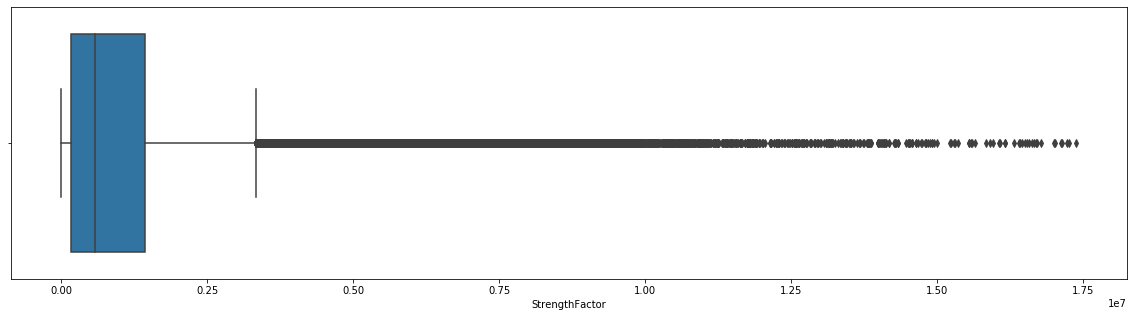

In [25]:
plt.figure(figsize=[20,5])
sns.boxplot(data.StrengthFactor)

### the data seems to be highly skewed towards right

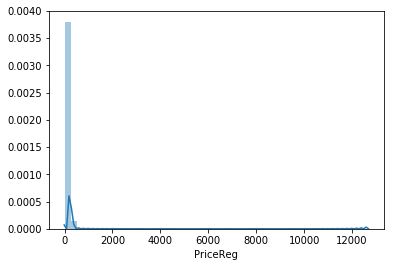

In [11]:
sns.distplot(data.PriceReg)

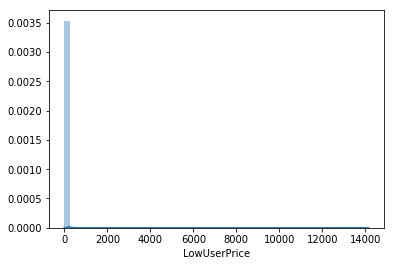

In [12]:
sns.distplot(data.LowUserPrice)

In [13]:
data.MarketingType.value_counts()

S    100946
D     97971
Name: MarketingType, dtype: int64

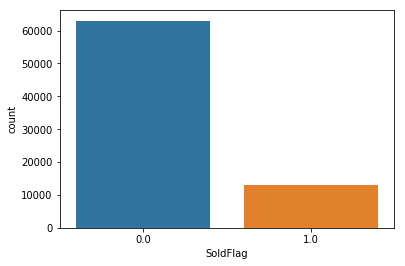

In [14]:
sns.countplot(data.SoldFlag)

# Inferences so far from the data

###    The some columns in data seems to be highly skewed towards right , this problem needs to be adressed , and there are various techniques that can be used 
###    for correction of same, i would recommend to go with outlier treatment with MICE.
    
###    MICE is used to impute null values by predictions based on several algorithms and thus to treat outliers by MICE we first need to make outliers null
###    and then impute them with MICE.
    
###    However for this problem we would only dealing with base model with basic EDA, and would focus more on hyperparameter tuning.

In [15]:
data.head()

,File_Type,SoldFlag,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,Historical,0.0,D,15,1,682743.0,44.99,8,28.97,31.84
1,Historical,0.0,D,7,1,1016014.0,24.81,39,0.00,15.54
2,Historical,0.0,D,0,0,340464.0,46.00,34,30.19,27.97
3,Historical,1.0,D,4,1,334011.0,100.00,20,133.93,83.15
4,Historical,1.0,D,2,1,1287938.0,121.95,28,4.00,23.99


### In classification problem it is important to scale every column and thus we would be using Standard Scaler found in sklearn library

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
# Also we gonna be only scaling continous data columns

In [17]:
scdata=pd.DataFrame(sc.fit_transform(data.drop(["File_Type","SoldFlag","MarketingType","New_Release_Flag"],axis=1)),columns=data.drop(["File_Type","SoldFlag","MarketingType","New_Release_Flag"],axis=1).columns)

In [18]:
scdata.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741


In [19]:
scdata.isnull().sum()

ReleaseNumber     0
StrengthFactor    0
PriceReg          0
ItemCount         0
LowUserPrice      0
LowNetPrice       0
dtype: int64

In [20]:
scdata[["File_Type","SoldFlag","MarketingType","New_Release_Flag"]]=data[["File_Type","SoldFlag","MarketingType","New_Release_Flag"]]

In [21]:
scdata.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,File_Type,SoldFlag,MarketingType,New_Release_Flag
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,Historical,0.0,D,1
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,Historical,0.0,D,1
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,Historical,0.0,D,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,Historical,1.0,D,1
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,Historical,1.0,D,1


## now we have to make dummies of all the categorical columns in the data and for that get_dummies function does the work

In [22]:
data=pd.get_dummies(scdata)

In [23]:
data.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,0.0,1,0,1,1,0
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,0.0,1,0,1,1,0
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,0.0,0,0,1,1,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,1.0,1,0,1,1,0
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,1.0,1,0,1,1,0


## lets get a basic idea of columns relation with each other with the help of pair plots

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


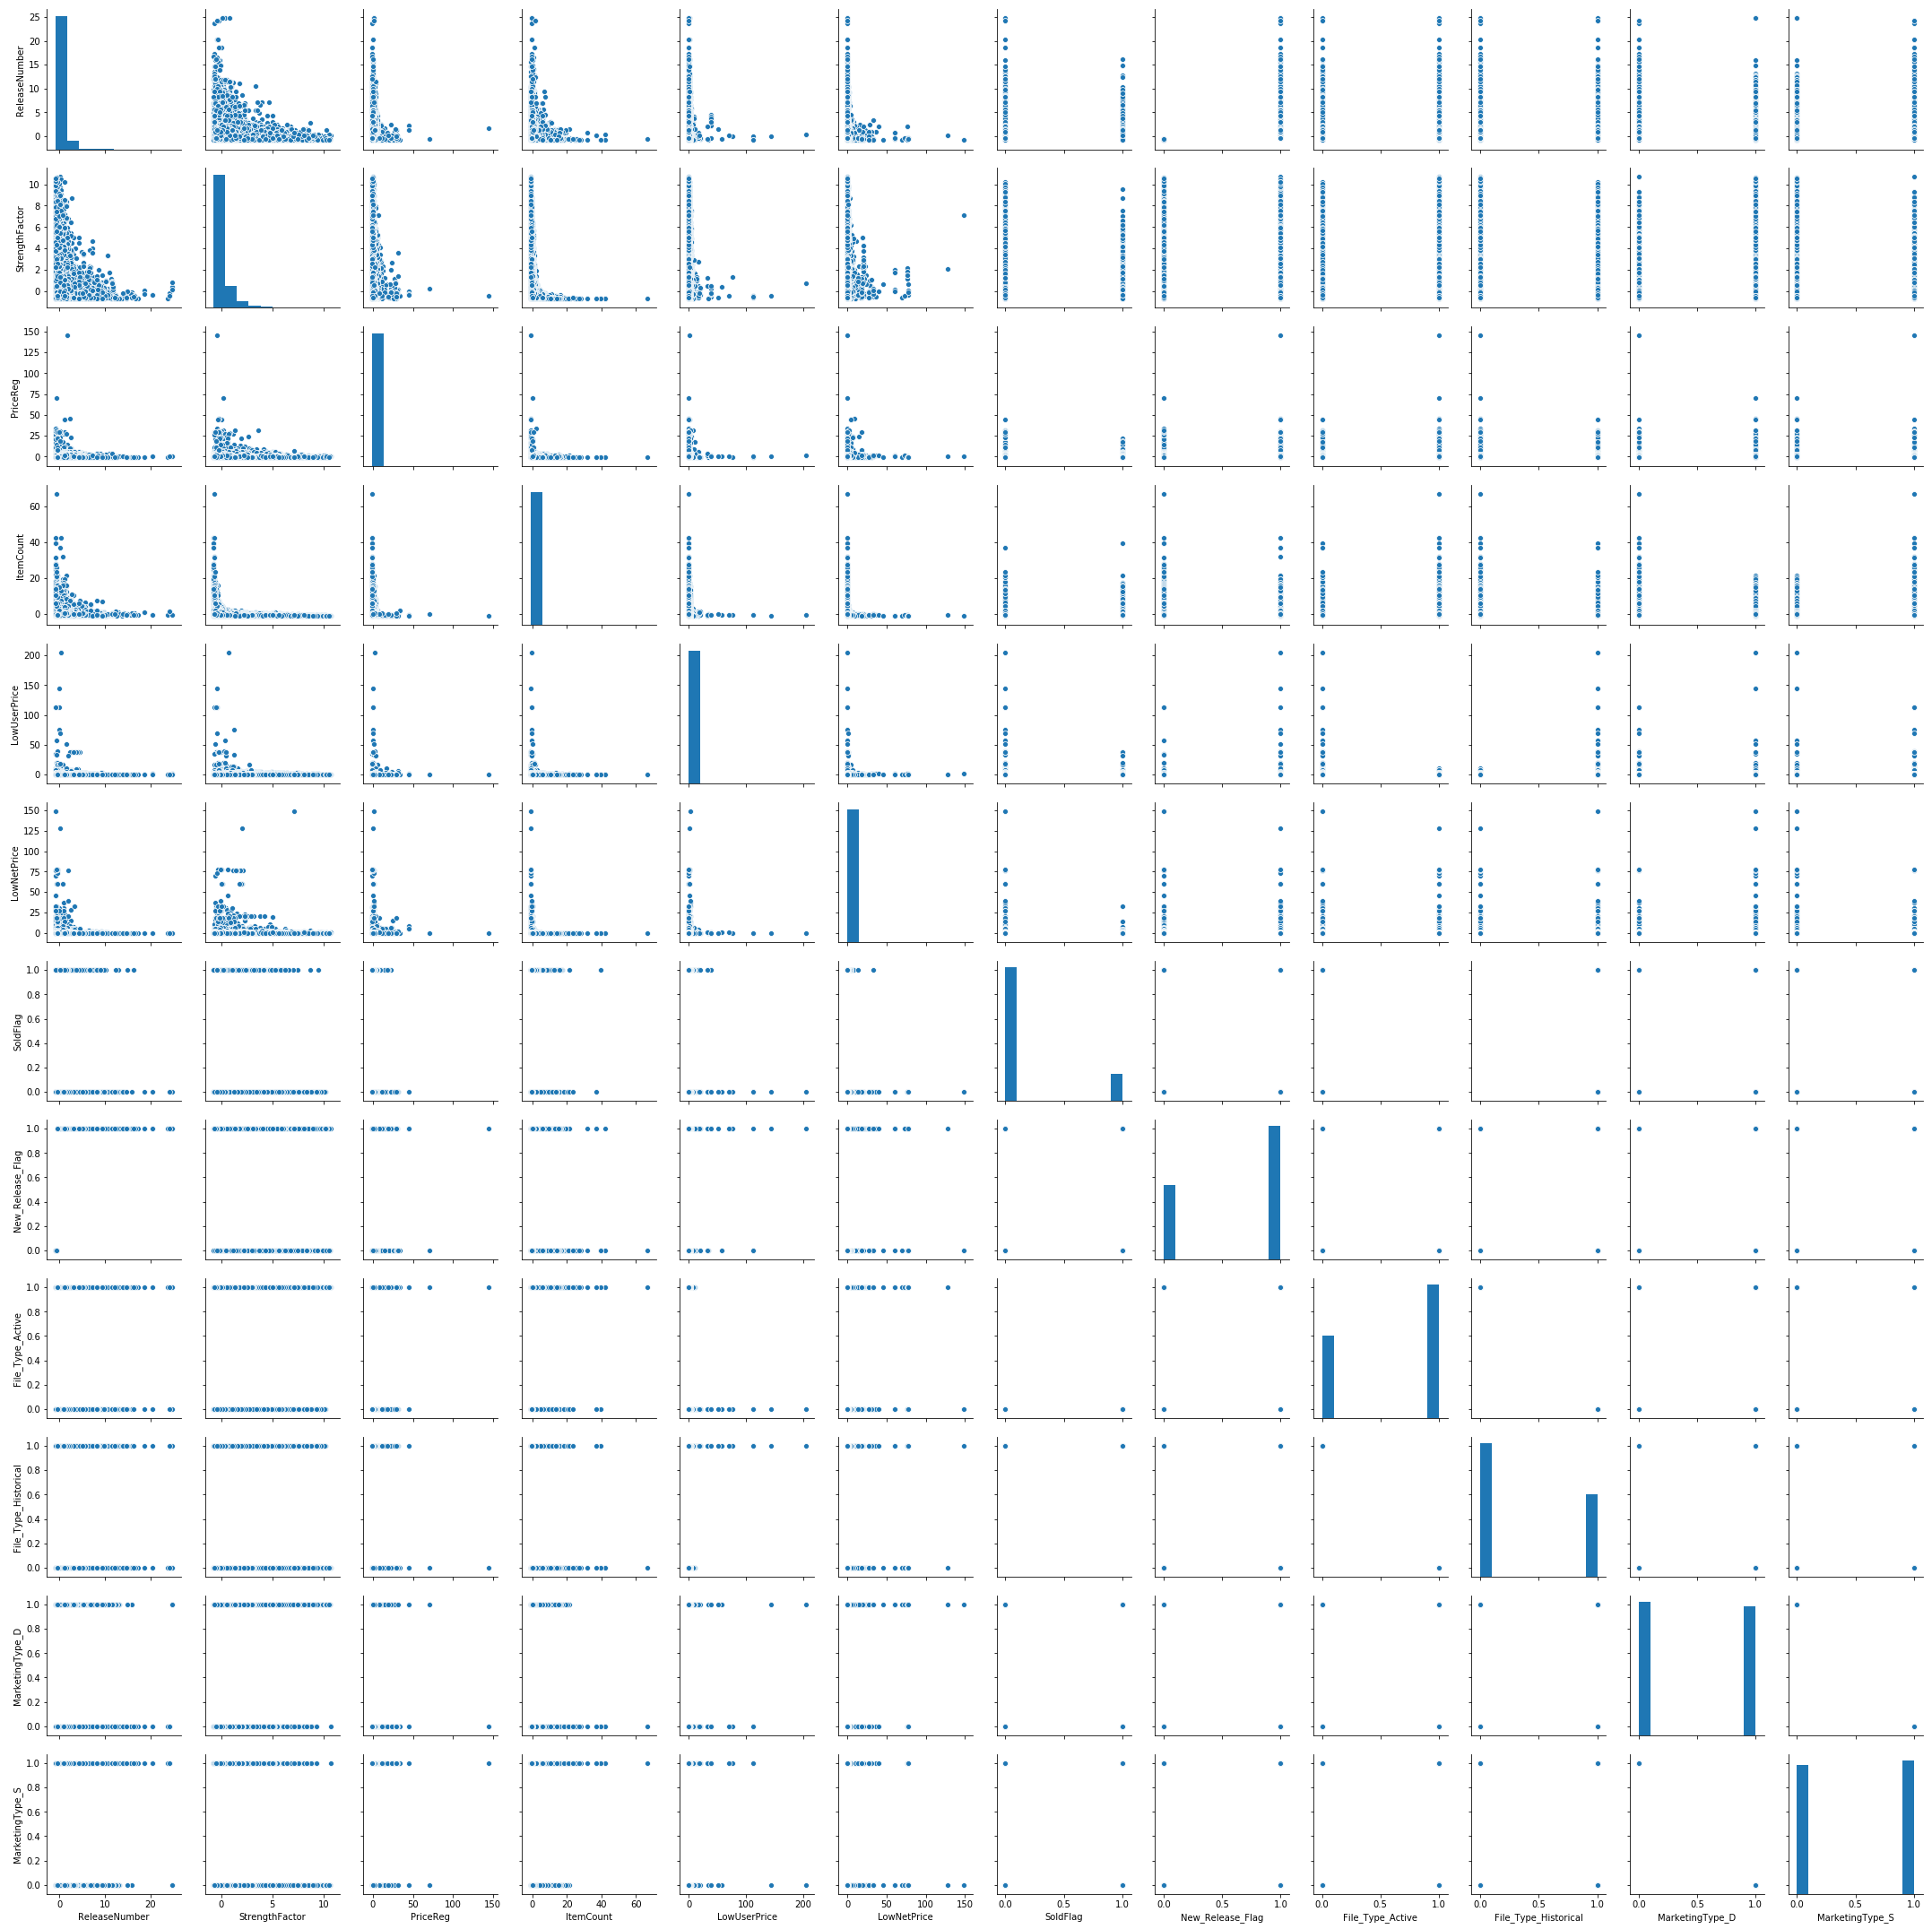

In [24]:
sns.pairplot(data)

## Now we gonna be spliting our data where null values start in SoldFlag column, also it should be clear that our target variable is SoldFlag (which basically indicates if the item is sold or not)

In [25]:
test=data[data.SoldFlag.isnull()]

In [26]:
test.SoldFlag.value_counts()

Series([], Name: SoldFlag, dtype: int64)

In [27]:
test.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
75996,1.446030,0.088276,0.022191,0.201745,-0.282664,0.173118,NaN,1,1,0,0,1
75997,0.152112,0.847492,-0.483019,-1.103491,-0.448593,0.016869,NaN,1,1,0,0,1
75998,-0.106671,3.793226,-0.529713,-1.103491,-0.448593,-0.364415,NaN,1,1,0,0,1
75999,1.187247,-0.673781,1.476948,0.068557,-0.250087,0.100986,NaN,1,1,0,0,1
76000,0.410896,3.814292,-0.080073,-1.103491,-0.448593,0.256534,NaN,1,1,0,0,1


In [28]:
test.shape

(122921, 12)

## After extracting the data for later predictions the rest remainder will be used for training the model

In [29]:
train=data[data.SoldFlag.notnull()]

In [30]:
train.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,0.0,1,0,1,1,0
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,0.0,1,0,1,1,0
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,0.0,0,0,1,1,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,1.0,1,0,1,1,0
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,1.0,1,0,1,1,0


In [31]:
train["SoldFlag"].unique()

array([0., 1.])

In [32]:
test.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
75996,1.446030,0.088276,0.022191,0.201745,-0.282664,0.173118,NaN,1,1,0,0,1
75997,0.152112,0.847492,-0.483019,-1.103491,-0.448593,0.016869,NaN,1,1,0,0,1
75998,-0.106671,3.793226,-0.529713,-1.103491,-0.448593,-0.364415,NaN,1,1,0,0,1
75999,1.187247,-0.673781,1.476948,0.068557,-0.250087,0.100986,NaN,1,1,0,0,1
76000,0.410896,3.814292,-0.080073,-1.103491,-0.448593,0.256534,NaN,1,1,0,0,1


In [33]:
xtest11=test.drop("SoldFlag",axis=1)

In [34]:
xtrain1=train.drop("SoldFlag",axis=1)

In [35]:
ytrain1=train.SoldFlag

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain1,ytrain1,test_size=0.30,random_state=2)

In [39]:
xtrain.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
22530,1.704814,-0.219424,-0.010898,-0.304367,0.286936,0.234357,1,0,1,1,0
63902,-0.365455,-0.476745,0.047325,-0.703929,-0.448593,-0.107709,1,0,1,0,1
33237,0.152112,0.011445,0.174146,0.068557,0.637326,-0.008264,1,0,1,1,0
19334,-0.365455,0.683313,-0.356198,-0.730566,-0.448593,0.090870,1,0,1,1,0
73705,-0.106671,-0.647342,-0.529252,0.308294,-0.002787,-0.076584,1,0,1,0,1


In [40]:
ytrain.head()

22530    1.0
63902    0.0
33237    0.0
19334    0.0
73705    0.0
Name: SoldFlag, dtype: float64

# Modeling : 

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [44]:
dt=DecisionTreeClassifier()

In [45]:
ypred=dt.fit(xtrain,ytrain).predict(xtest)

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85     18860
         1.0       0.29      0.30      0.29      3939

    accuracy                           0.75     22799
   macro avg       0.57      0.57      0.57     22799
weighted avg       0.75      0.75      0.75     22799

Accuracy: 75.01 %


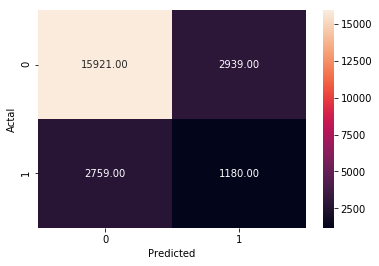

In [46]:
print (classification_report(ytest, ypred))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred) * 100))

sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

## Random Forest


In [48]:
from sklearn.ensemble import RandomForestClassifier
batman=RandomForestClassifier()

In [49]:
ypred1=batman.fit(xtrain,ytrain).predict(xtest)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     18860
         1.0       0.48      0.15      0.23      3939

    accuracy                           0.82     22799
   macro avg       0.66      0.56      0.57     22799
weighted avg       0.78      0.82      0.79     22799

Accuracy: 82.48 %


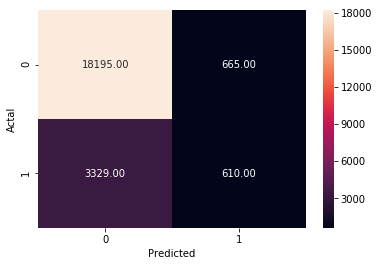

In [50]:
print (classification_report(ytest, ypred1))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred1) * 100))

sns.heatmap(confusion_matrix(ytest, ypred1), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

## Hyper parameter tuning of random forest by GridSearch CV

In [51]:
from sklearn.model_selection import GridSearchCV

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(batman, cv = 10,param_grid=param_dist)


In [52]:
cv_rf.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [53]:
cv_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None}

In [54]:
batman=RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 4, max_features = None)

In [55]:
ypred2=batman.fit(xtrain,ytrain).predict(xtest)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     18860
         1.0       0.67      0.06      0.12      3939

    accuracy                           0.83     22799
   macro avg       0.75      0.53      0.51     22799
weighted avg       0.81      0.83      0.77     22799

Accuracy: 83.28 %


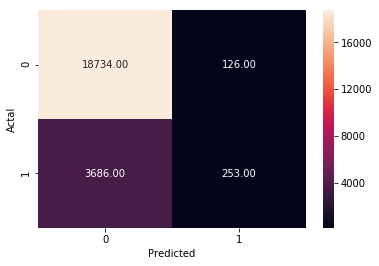

In [56]:
print (classification_report(ytest, ypred2))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred2) * 100))

sns.heatmap(confusion_matrix(ytest, ypred2), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

# As observed the accuracy increases with the help of grid search 

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [59]:
ypred3=lr.fit(xtrain,ytrain).predict(xtest)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     18860
         1.0       0.61      0.08      0.15      3939

    accuracy                           0.83     22799
   macro avg       0.72      0.54      0.53     22799
weighted avg       0.80      0.83      0.78     22799

Accuracy: 83.23 %


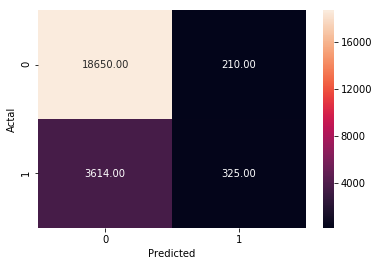

In [60]:
print (classification_report(ytest, ypred3))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred3) * 100))

sns.heatmap(confusion_matrix(ytest, ypred3), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

## KNN Model

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [63]:
ypred7=knn.fit(xtrain,ytrain).predict(xtest)

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     18860
         1.0       0.42      0.20      0.27      3939

    accuracy                           0.81     22799
   macro avg       0.63      0.57      0.58     22799
weighted avg       0.77      0.81      0.79     22799

Accuracy: 81.35 %


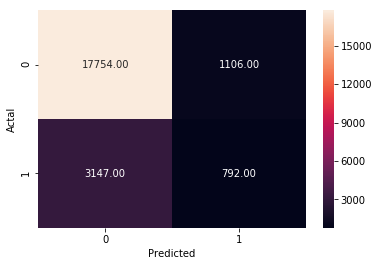

In [64]:
print (classification_report(ytest, ypred7))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred7) * 100))

sns.heatmap(confusion_matrix(ytest, ypred7), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

### Applying Grid Search

In [ ]:
l=[]
for i in range(1,10):
    l.append(i)
from sklearn.model_selection import GridSearchCV

param_dist = {"n_neighbors": l, "p":[1,2,3]}
cv_rf = GridSearchCV(knn, cv = 3,param_grid=param_dist)
cv_rf.fit(xtrain, np.ravel(ytrain))
print(cv_rf.best_params_)


In [66]:
knn=KNeighborsClassifier(n_neighbors= 8, p= 3)

In [67]:
ypred8=knn.fit(xtrain,ytrain).predict(xtest)

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     18860
         1.0       0.49      0.13      0.20      3939

    accuracy                           0.83     22799
   macro avg       0.67      0.55      0.55     22799
weighted avg       0.78      0.83      0.78     22799

Accuracy: 82.64 %


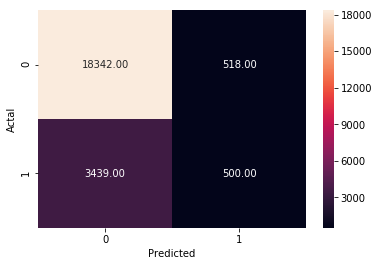

In [68]:
print (classification_report(ytest, ypred8))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred8) * 100))

sns.heatmap(confusion_matrix(ytest, ypred8), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

## XGBoost

In [70]:
from xgboost import XGBRFClassifier
xg=XGBRFClassifier()

In [71]:
ypred9=xg.fit(xtrain,ytrain).predict(xtest)

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91     18860
         1.0       0.68      0.05      0.10      3939

    accuracy                           0.83     22799
   macro avg       0.76      0.52      0.50     22799
weighted avg       0.81      0.83      0.77     22799

Accuracy: 83.22 %


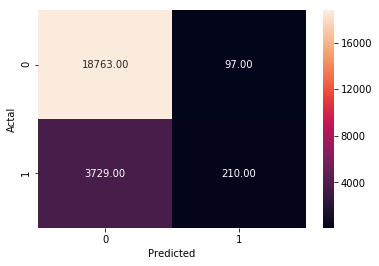

In [72]:
print (classification_report(ytest, ypred9))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred9) * 100))

sns.heatmap(confusion_matrix(ytest, ypred9), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

## Predicting the values of SaleFlag using out model using Random Forest Model

In [74]:
x2=test.drop("SoldFlag",axis=1)

In [75]:
ypred10=batman.predict(x2)

In [76]:
pd.DataFrame(ypred10).head()     # Predicted values

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [77]:
xyz=data1[data1.SoldFlag.isnull()]

In [78]:
xyz.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,85107,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,85108,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,85109,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,85110,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,85111,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80


In [79]:
xyz.SoldFlag=ypred10

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [80]:
xyz.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag                 0
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [81]:
xyz.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,85107,Active,869734,0.0,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,85108,Active,3741319,0.0,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,85109,Active,3517789,0.0,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,85110,Active,1455936,0.0,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,85111,Active,2921480,0.0,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80


# Final words : There is a lots of room for improvement to further refine our result as till now all the outputs are predicted after doing only a basic EDA
#   After proper outliers treatment and balancing the data, also feature importance, our results can definetely be improved